<a href="https://colab.research.google.com/github/choibyoungjune/pythonbasic/blob/master/daum_%EC%98%81%ED%99%94_%EC%82%AC%EC%9D%B4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlopen
import re
from bs4 import BeautifulSoup as bs

#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
def charEncode(st) :
  pt = r'charset[ ]*=[\']*[\"]*([\w-]+)[\"]*[\']*'
  
  return re.search(pt, st) and re.search(pt, st).group(1) or 'utf-8'
  
def urlHtml(url) :
  url_data = urlopen(url).read()
  urlcc = charEncode(str(url_data))
  html = url_data.decode(urlcc)
  return html

In [ ]:
def getBoxoffice(year) :
  html_data = urlHtml('https://movie.daum.net/boxoffice/yearly?year='+year)
  bs_data = bs(html_data, 'html.parser')
  movie_info = bs_data.select(".list_boxthumb > li")
  movie_name = []
  movie_star = []

  #순위 뽑기
  pat = r'data-tiara-ordnum=\"([\d]+)\"'

  #href 뽑기
  #pat = r'href=\"\/moviedb\/main\?movieId=([\d]+)\"'

  for i in movie_info:
    movie_name.append(i.select('.link_g')[0].getText())
    movie_star.append(float(i.select('.emph_grade')[0].getText()))
    print(f"{input_year}, {re.search(pat, str(i.find('a'))).group(1)}위, {i.select('.link_g')[0].getText()}, {i.select('.emph_grade')[0].getText()}, {i.select('dd')[0].getText().replace('개봉','')}")
  return list(zip(movie_name, movie_star))

2019, 1위, 극한직업, 7.4, 2019.01.23 
2019, 2위, 어벤져스: 엔드게임, 7.8, 2019.04.24 
2019, 3위, 겨울왕국 2, 7.4, 2019.11.21 
2019, 4위, 알라딘, 8.4, 2019.05.23 
2019, 5위, 기생충, 7.9, 2019.05.30 
2019, 6위, 엑시트, 7.7, 2019.07.31 
2019, 7위, 스파이더맨: 파 프롬 홈, 6.5, 2019.07.02 
2019, 8위, 백두산, 6.5, 2019.12.19 
2019, 9위, 캡틴 마블, 6.3, 2019.03.06 
2019, 10위, 조커, 7.7, 2019.10.02 
2019, 11위, 봉오동 전투, 8.8, 2019.08.07 
2019, 12위, 라이온 킹, 7.4, 2019.07.17 
2019, 13위, 나쁜 녀석들: 더 무비, 6.3, 2019.09.11 
2019, 14위, 82년생 김지영, 6.7, 2019.10.23 
2019, 15위, 분노의 질주: 홉스&쇼, 7.0, 2019.08.14 
2019, 16위, 토이 스토리 4, 8.6, 2019.06.20 
2019, 17위, 돈, 6.7, 2019.03.20 
2019, 18위, 악인전, 7.4, 2019.05.15 
2019, 19위, 가장 보통의 연애, 7.4, 2019.10.02 
2019, 20위, 말모이, 9.1, 2019.01.09 
2019, 21위, 증인, 9.3, 2019.02.13 
2019, 22위, 시동, 7.6, 2019.12.18 
2019, 23위, 블랙머니, 9.1, 2019.11.13 
2019, 24위, 터미네이터: 다크 페이트, 7.8, 2019.10.30 
2019, 25위, 사바하, 7.3, 2019.02.20 
2019, 26위, 타짜: 원 아이드 잭, 5.2, 2019.09.11 
2019, 27위, 신의 한 수: 귀수편, 6.8, 2019.11.07 
2019, 28위, 알리타: 배틀 엔젤, 8.3, 2019.0

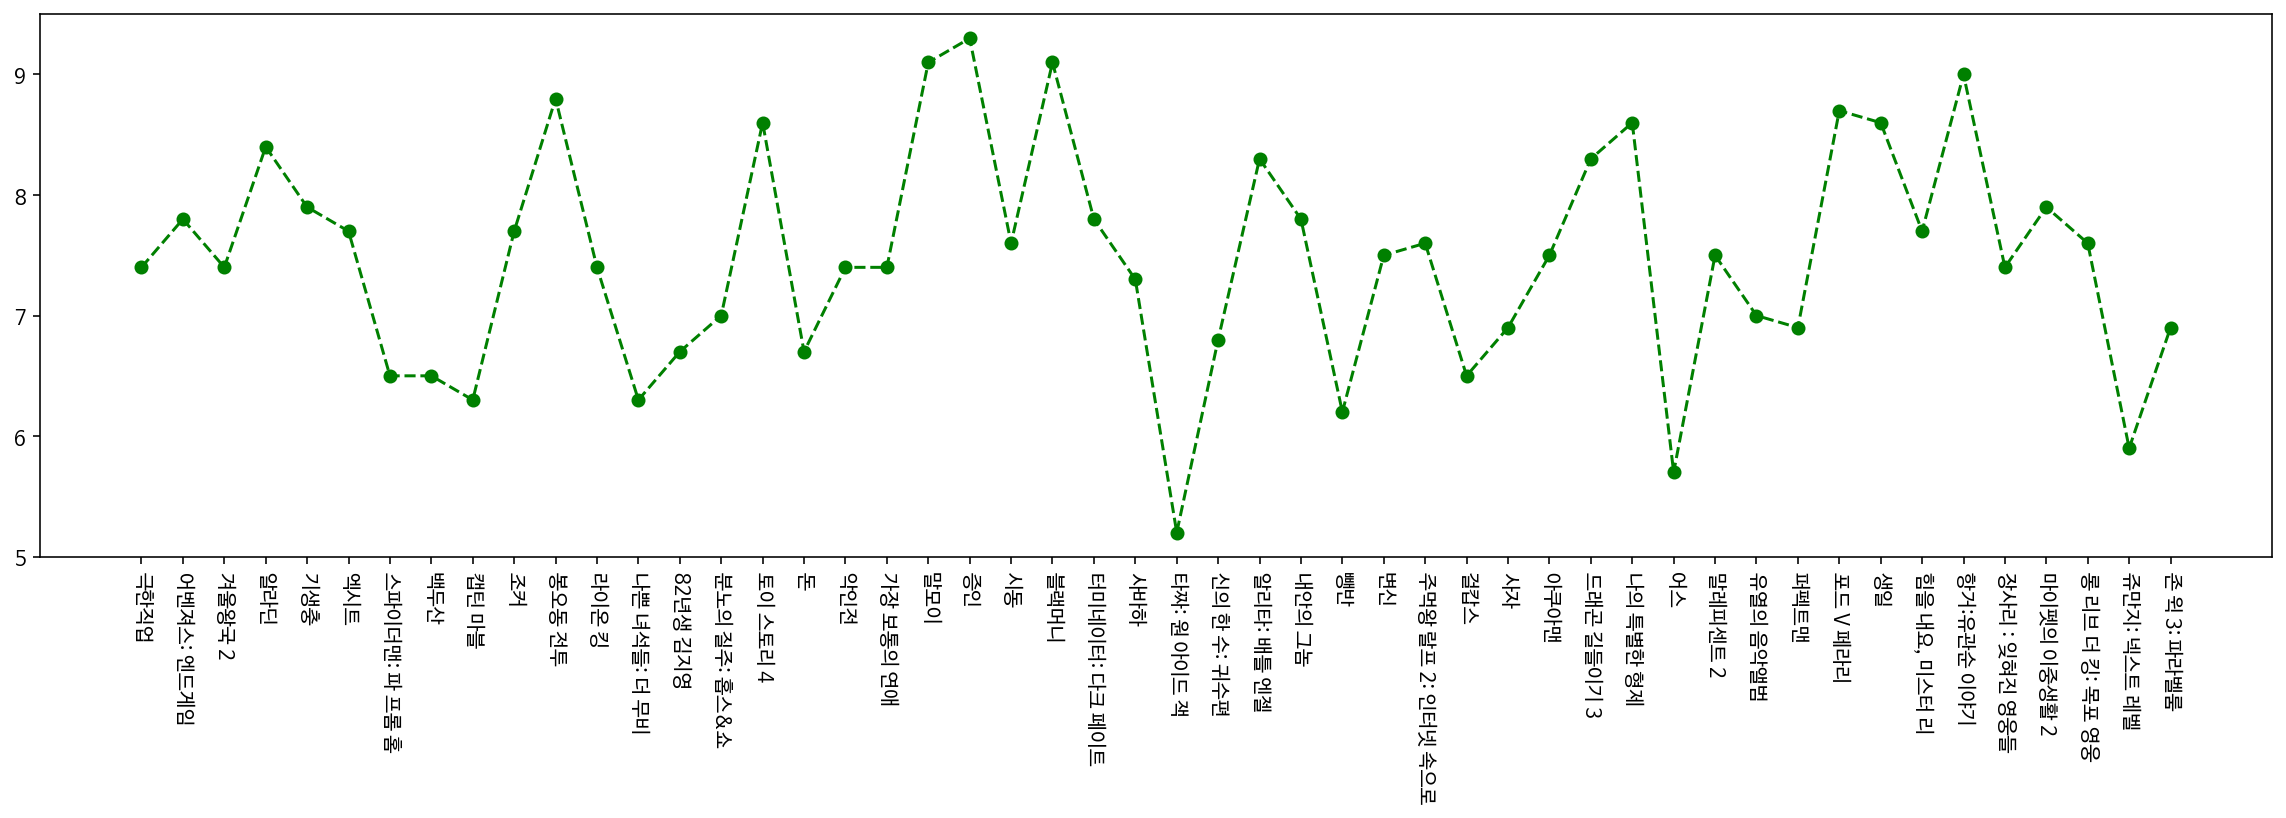

In [72]:
#input_year = input("연도를 입력하세요 : ")
movie_ns1 = getBoxoffice('2019')
movie_ns2 = getBoxoffice('2018')

movie_name = [i[0] for i in movie_ns1]
movie_star = [i[1] for i in movie_ns1]

with open('movie.txt','w') as f:
  for i in list(zip(movie_name, movie_star)):
    i = str(i).replace('[','').replace(']','').replace(')','').replace('(','')
    f.write(i)
    f.write('\n')

plt.figure(figsize=(20,5))
plt.plot(movie_name, movie_star, 'go--')
plt.xticks(rotation=270)
plt.show()